## Introduction ##

In this notebook, I have done a comparison of some basic classifiers on the Wine Dataset.  The maximum accuracy obtained is around 97%. 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Wine.csv



## Loading Data ##

In [3]:
df=pd.read_csv('../input/Wine.csv',header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [6]:
df.shape

(178, 14)

In [4]:
df.tail(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


## Adding Headers ##

In [5]:
df.columns = [  'name'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]

df.head(2)

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [7]:
df.columns

Index(['name', 'alcohol', 'malicAcid', 'ash', 'ashalcalinity', 'magnesium',
       'totalPhenols', 'flavanoids', 'nonFlavanoidPhenols', 'proanthocyanins',
       'colorIntensity', 'hue', 'od280_od315', 'proline'],
      dtype='object')

In [8]:
for col in df.columns: 
    print(col) 

name
alcohol
malicAcid
ash
ashalcalinity
magnesium
totalPhenols
flavanoids
nonFlavanoidPhenols
proanthocyanins
colorIntensity
hue
od280_od315
proline


In [9]:
list(df.columns.values) 

['name',
 'alcohol',
 'malicAcid',
 'ash',
 'ashalcalinity',
 'magnesium',
 'totalPhenols',
 'flavanoids',
 'nonFlavanoidPhenols',
 'proanthocyanins',
 'colorIntensity',
 'hue',
 'od280_od315',
 'proline']

## Check for Missing Values ##

In [10]:
df.isnull().sum()

name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

## Heatmap for Correlation of Parameters ##

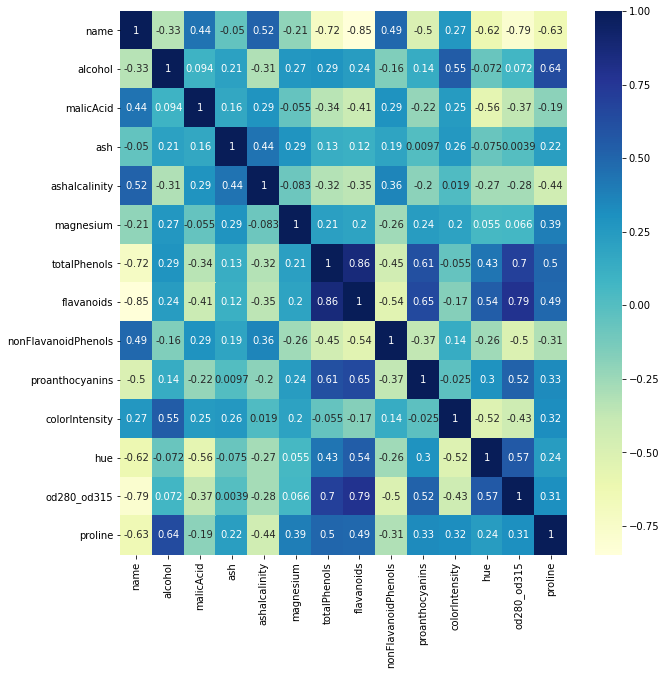

In [11]:
import seaborn as sns
plt.figure(figsize=(10, 10))
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)

 - 'ash' is the least correlated. So, dropping it.

## Features ##

In [12]:
X= df.drop(['name','ash'], axis=1)

X.head()

,alcohol,malicAcid,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,14.23,1.71,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
df.iloc[:3]   # rows from 0 to 2

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [21]:
df.iloc[:3, 2]    # rows 0-2, col 2

0    1.71
1    1.78
2    2.36
Name: malicAcid, dtype: float64

In [22]:
df.iloc[:3, :2]    # rows 0-2, cols 0-1

,name,alcohol
0,1,14.23
1,1,13.20
2,1,13.16


In [26]:
df.iloc[:, :1]       # all rows, col 1 only

,name
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


## Labels ##

In [27]:
Y=df.iloc[:,:1]    # all rows, col 1 only    <<< must be classification
Y.head(3)

,name
0,1
1,1
2,1


In [28]:
Y.tail(3)

,name
175,3
176,3
177,3


In [30]:
# iterate through each row and select nam
for i in range(len(Y)) : 
  print(Y.loc[i]) 

name    1
Name: 0, dtype: int64
name    1
Name: 1, dtype: int64
name    1
Name: 2, dtype: int64
name    1
Name: 3, dtype: int64
name    1
Name: 4, dtype: int64
name    1
Name: 5, dtype: int64
name    1
Name: 6, dtype: int64
name    1
Name: 7, dtype: int64
name    1
Name: 8, dtype: int64
name    1
Name: 9, dtype: int64
name    1
Name: 10, dtype: int64
name    1
Name: 11, dtype: int64
name    1
Name: 12, dtype: int64
name    1
Name: 13, dtype: int64
name    1
Name: 14, dtype: int64
name    1
Name: 15, dtype: int64
name    1
Name: 16, dtype: int64
name    1
Name: 17, dtype: int64
name    1
Name: 18, dtype: int64
name    1
Name: 19, dtype: int64
name    1
Name: 20, dtype: int64
name    1
Name: 21, dtype: int64
name    1
Name: 22, dtype: int64
name    1
Name: 23, dtype: int64
name    1
Name: 24, dtype: int64
name    1
Name: 25, dtype: int64
name    1
Name: 26, dtype: int64
name    1
Name: 27, dtype: int64
name    1
Name: 28, dtype: int64
name    1
Name: 29, dtype: int64
name    1
Name: 30, 

In [32]:
# iterate through each row and select name, change to float
for i in range(len(Y)) : 
    Y.loc[i] = float(Y.loc[i])
    print(Y.loc[i]) 

name    1.0
Name: 0, dtype: float64
name    1.0
Name: 1, dtype: float64
name    1.0
Name: 2, dtype: float64
name    1.0
Name: 3, dtype: float64
name    1.0
Name: 4, dtype: float64
name    1.0
Name: 5, dtype: float64
name    1.0
Name: 6, dtype: float64
name    1.0
Name: 7, dtype: float64
name    1.0
Name: 8, dtype: float64
name    1.0
Name: 9, dtype: float64
name    1.0
Name: 10, dtype: float64
name    1.0
Name: 11, dtype: float64
name    1.0
Name: 12, dtype: float64
name    1.0
Name: 13, dtype: float64
name    1.0
Name: 14, dtype: float64
name    1.0
Name: 15, dtype: float64
name    1.0
Name: 16, dtype: float64
name    1.0
Name: 17, dtype: float64
name    1.0
Name: 18, dtype: float64
name    1.0
Name: 19, dtype: float64
name    1.0
Name: 20, dtype: float64
name    1.0
Name: 21, dtype: float64
name    1.0
Name: 22, dtype: float64
name    1.0
Name: 23, dtype: float64
name    1.0
Name: 24, dtype: float64
name    1.0
Name: 25, dtype: float64
name    1.0
Name: 26, dtype: float64
name    1.0

In [ ]:
# DO NOT DO THIS ONE, ALREADY HAVE NAME
# Using 'wine' as the column name (add the dependent var)
#df['wine'] = Y 

In [33]:
df.head

<bound method NDFrame.head of      name  alcohol  malicAcid   ash  ashalcalinity  magnesium  totalPhenols  \
0       1    14.23       1.71  2.43           15.6        127          2.80   
1       1    13.20       1.78  2.14           11.2        100          2.65   
2       1    13.16       2.36  2.67           18.6        101          2.80   
3       1    14.37       1.95  2.50           16.8        113          3.85   
4       1    13.24       2.59  2.87           21.0        118          2.80   
..    ...      ...        ...   ...            ...        ...           ...   
173     3    13.71       5.65  2.45           20.5         95          1.68   
174     3    13.40       3.91  2.48           23.0        102          1.80   
175     3    13.27       4.28  2.26           20.0        120          1.59   
176     3    13.17       2.59  2.37           20.0        120          1.65   
177     3    14.13       4.10  2.74           24.5         96          2.05   

     flavanoids  nonF

## Train-Test Split ##

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)

(124, 12)
(54, 12)


## Classifier Models ##

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear")))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
models.append(("eXtreme Gradient Boost:",XGBClassifier()))
models.append(("MLP:",MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

print('Models appended...')

Models appended...


## Results ##

In [36]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,X_train,Y_train.values.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

Logistic Regression: 96.79487179487178
Naive Bayes: 96.02564102564102
K-Nearest Neighbour: 71.92307692307692
Decision Tree: 88.78205128205127
Support Vector Machine-linear: 96.02564102564102
Support Vector Machine-rbf: 62.11538461538463
Random Forest: 92.82051282051282
eXtreme Gradient Boost: 93.65384615384616
MLP: 34.679487179487175
AdaBoostClassifier: 89.42307692307693
GradientBoostingClassifier: 94.42307692307693


This was a basic analysis and classification without much optimization. Results of accuracy over 95% denotes the quality of data being very good, which makes it easy for classification. Thank you for scrolling!

# Now do a fastai nnet classification

In [37]:
!curl -s https://course.fast.ai/setup/colab | bash

In [38]:
from fastai.tabular import *

In [49]:
# already have our pandas dataframe
df.head

<bound method NDFrame.head of      name  alcohol  malicAcid   ash  ashalcalinity  magnesium  totalPhenols  \
0       1    14.23       1.71  2.43           15.6        127          2.80   
1       1    13.20       1.78  2.14           11.2        100          2.65   
2       1    13.16       2.36  2.67           18.6        101          2.80   
3       1    14.37       1.95  2.50           16.8        113          3.85   
4       1    13.24       2.59  2.87           21.0        118          2.80   
..    ...      ...        ...   ...            ...        ...           ...   
173     3    13.71       5.65  2.45           20.5         95          1.68   
174     3    13.40       3.91  2.48           23.0        102          1.80   
175     3    13.27       4.28  2.26           20.0        120          1.59   
176     3    13.17       2.59  2.37           20.0        120          1.65   
177     3    14.13       4.10  2.74           24.5         96          2.05   

     flavanoids  nonF

In [42]:
df.columns[1:]

Index(['alcohol', 'malicAcid', 'ash', 'ashalcalinity', 'magnesium',
       'totalPhenols', 'flavanoids', 'nonFlavanoidPhenols', 'proanthocyanins',
       'colorIntensity', 'hue', 'od280_od315', 'proline'],
      dtype='object')

In [57]:
dep_var = 1   # dep variable 1
cat_names = []   # no categoricals
cont_names = df.columns[1:]  # all the columns after the first
procs = [FillMissing, Categorify, Normalize]
valid_idx = range(len(df)-34, len(df))   # think this is validation set

In [58]:
# think this is test set
test = TabularList.from_df(df.iloc[:34].copy(), path=".", cat_names=cat_names, cont_names=cont_names)

In [59]:
data = (TabularList.from_df(df, path=".", cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(157,178)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [60]:
data.show_batch(rows=10)

alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline,target
0.4608,-1.1815,0.0340,-0.6542,0.6944,0.2648,-0.9661,1.6623,-2.1339,-0.7427,0.1198,-1.1882,-0.0256,13.34
-1.8676,-1.3686,0.5320,0.5467,-0.7981,0.1835,-0.2057,0.5964,-0.3436,-0.7897,0.4919,-0.6231,-0.9796,11.41
0.4126,-0.4517,-0.7486,-0.6542,-0.3911,0.0535,-0.0129,-0.6335,-0.5015,-0.3347,0.1198,0.0611,1.5895,13.3
-0.3113,1.5597,0.1763,1.1472,0.0838,0.7523,0.3727,0.6784,0.5516,-1.0565,0.9105,0.5965,-0.8920,12.7
2.2584,-0.5266,-0.6419,-1.5549,-0.1875,0.7035,0.8332,-0.4695,0.6043,0.3192,0.3989,0.1801,0.8650,14.83
-0.3837,-0.7885,-1.1755,-0.7143,0.0160,-0.5640,-0.8483,1.4983,-1.7829,0.6069,-0.0662,-1.6939,-0.9313,12.64
-0.8904,-0.8540,-1.4600,-0.0537,-0.5267,-0.0115,-0.1735,0.3504,0.7798,-0.9885,-0.6244,0.4329,-1.3479,12.22
0.1110,-0.1430,3.0932,1.7477,1.6442,0.4273,0.5119,1.0064,0.4990,-0.5282,0.6314,0.7006,0.2159,13.05
-1.3729,-0.4517,-1.6735,0.0964,-0.9338,0.2160,-0.6020,0.1864,-0.3787,-1.3233,-0.2523,-0.4297,-1.0369,11.82
-2.3260,-0.6482,-0.5352,0.6969,-1.0016,0.1510,-0.0343,1.4163,0.6569,-1.4070,3.3292,0.2098,-1.0611,11.03


In [54]:
# df['target']

In [63]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [64]:
# select the appropriate learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


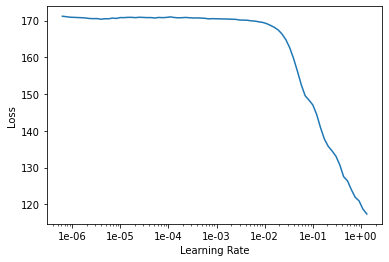

In [65]:
# we typically find the point where the slope is steepest
learn.recorder.plot()

In [ ]:
# Fit the model based on selected learning rate
learn.fit_one_cycle(15, max_lr=slice(1e-01))

In [ ]:
# Analyse our model
learn.model
learn.recorder.plot_losses()

In [ ]:
# old original one:  learn.fit(1, 1e-2)

# Inference

In [ ]:
row = df.iloc[0]

In [ ]:
learn.predict(row)